In [14]:
# Importowanie bibliotek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree


In [15]:
nazwy_kolumn_pl = [
    "klasa",  # class
    "ksztalt-kapelusza",  # cap-shape
    "powierzchnia-kapelusza",  # cap-surface
    "kolor-kapelusza",  # cap-color
    "siniaki",  # bruises
    "zapach",  # odor
    "mocowanie-blaszek",  # gill-attachment
    "odstępy-blaszek",  # gill-spacing
    "rozmiar-blaszek",  # gill-size
    "kolor-blaszek",  # gill-color
    "ksztalt-trzonu",  # stalk-shape
    "korzeń-trzonu",  # stalk-root
    "powierzchnia-trzonu-nad-pierscieniem",  # stalk-surface-above-ring
    "powierzchnia-trzonu-pod-pierscieniem",  # stalk-surface-below-ring
    "kolor-trzonu-nad-pierscieniem",  # stalk-color-above-ring
    "kolor-trzonu-pod-pierscieniem",  # stalk-color-below-ring
    "typ-zasłony",  # veil-type
    "kolor-zasłony",  # veil-color
    "liczba-pierscieni",  # ring-number
    "typ-pierscienia",  # ring-type
    "kolor-zarodników",  # spore-print-color
    "populacja",  # population
    "siedlisko"  # habitat
]


In [16]:
# wczytanie danych i zamiana nazw kolumn na polskie
df = pd.read_csv('/Users/jakub/Desktop/Data Mining/Projekt/mushroom/agaricus-lepiota.data', header=None)
df.columns = nazwy_kolumn_pl

In [17]:
# usuniecie wierszy z pustymi wartosciami   
df.dropna()

,klasa,ksztalt-kapelusza,powierzchnia-kapelusza,kolor-kapelusza,siniaki,zapach,mocowanie-blaszek,odstępy-blaszek,rozmiar-blaszek,kolor-blaszek,...,powierzchnia-trzonu-pod-pierscieniem,kolor-trzonu-nad-pierscieniem,kolor-trzonu-pod-pierscieniem,typ-zasłony,kolor-zasłony,liczba-pierscieni,typ-pierscienia,kolor-zarodników,populacja,siedlisko
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [18]:
# podstawowe statystyki dot. danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   klasa                                 8124 non-null   object
 1   ksztalt-kapelusza                     8124 non-null   object
 2   powierzchnia-kapelusza                8124 non-null   object
 3   kolor-kapelusza                       8124 non-null   object
 4   siniaki                               8124 non-null   object
 5   zapach                                8124 non-null   object
 6   mocowanie-blaszek                     8124 non-null   object
 7   odstępy-blaszek                       8124 non-null   object
 8   rozmiar-blaszek                       8124 non-null   object
 9   kolor-blaszek                         8124 non-null   object
 10  ksztalt-trzonu                        8124 non-null   object
 11  korzeń-trzonu                 

In [19]:
# ilosc wierszy i kolumn
df.shape 

(8124, 23)

In [20]:
# Sprawdzenie wartości unikatowych
# p = poisonous = trujące
# e = edible = jadalne
df['klasa'].unique()

array(['p', 'e'], dtype=object)

<AxesSubplot: xlabel='klasa', ylabel='Count'>

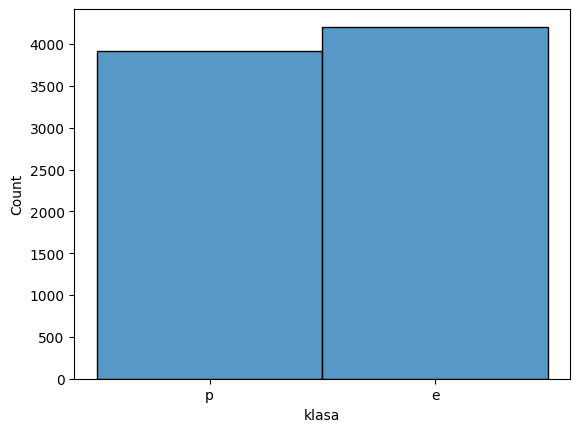

In [21]:
# Sprawdzenie rozkładu grzybów trujących i jadalnych
sns.histplot(df['klasa'])

In [22]:
X = df.drop('klasa', axis=1)
y = df['klasa']

In [23]:
# Zamiana atrybutów na wartości numeryczne [0-1] 
X = pd.get_dummies(X)
X.head()

,ksztalt-kapelusza_b,ksztalt-kapelusza_c,ksztalt-kapelusza_f,ksztalt-kapelusza_k,ksztalt-kapelusza_s,ksztalt-kapelusza_x,powierzchnia-kapelusza_f,powierzchnia-kapelusza_g,powierzchnia-kapelusza_s,powierzchnia-kapelusza_y,...,populacja_s,populacja_v,populacja_y,siedlisko_d,siedlisko_g,siedlisko_l,siedlisko_m,siedlisko_p,siedlisko_u,siedlisko_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
# Zamiana atrybutów na wartości numeryczne [0-1] 
atrybuty = pd.get_dummies(X)
atrybuty.head()

,ksztalt-kapelusza_b,ksztalt-kapelusza_c,ksztalt-kapelusza_f,ksztalt-kapelusza_k,ksztalt-kapelusza_s,ksztalt-kapelusza_x,powierzchnia-kapelusza_f,powierzchnia-kapelusza_g,powierzchnia-kapelusza_s,powierzchnia-kapelusza_y,...,populacja_s,populacja_v,populacja_y,siedlisko_d,siedlisko_g,siedlisko_l,siedlisko_m,siedlisko_p,siedlisko_u,siedlisko_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
enkoder_klasy = LabelEncoder()
y = enkoder_klasy.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


In [27]:
##podział losowy
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [28]:
X_train.shape , X_test.shape

((5686, 117), (2438, 117))

In [29]:
y_train.shape , y_test.shape

((5686,), (2438,))

In [30]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [31]:
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

NameError: name 'tree' is not defined

<Figure size 1200x800 with 0 Axes>